The first cell is a Markdown cell that contains a heading: "Introduction to Logistic Regression in TensorFlow". This indicates that the notebook is about explaining how to implement logistic regression, a popular machine learning algorithm, using TensorFlow, a powerful library for numerical computation, particularly suited for large-scale Machine Learning.

Logistic Regression is a type of algorithm used for classification problems, where the aim is to predict a binary outcome (1/0, Yes/No, True/False) given a set of independent variables. In the context of Machine Learning, TensorFlow provides the tools to define, train, and utilize this logistic regression model.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import trange

This cell is setting up the necessary Python libraries for the notebook:

%matplotlib inline is a command specific to Jupyter notebooks that allows the output of plotting commands to be displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it.

import numpy as np is importing the numpy library and aliasing it as np. Numpy is a popular library in Python that provides support for arrays and matrices, along with a large collection of mathematical functions to operate on these elements.

import matplotlib.pyplot as plt is importing the pyplot sublibrary from matplotlib and aliasing it as plt. Matplotlib is a plotting library in Python and pyplot provides a MATLAB-like interface for making plots and graphs.

import tensorflow as tf is importing the tensorflow library and aliasing it as tf. Tensorflow is a powerful library for numerical computation and is commonly used for machine learning tasks.

from tqdm import trange is importing the trange function from the tqdm library. tqdm is a library in Python that provides progress bars for loops and trange is a version of the built-in range function that includes a progress bar.

Think of these as gathering your tools before starting a project. You need to know what kind of task you are about to undertake and gather the appropriate tools.

The third cell is a Markdown cell with the text "MNIST Dataset". This is a subheading, indicating that the next section of the notebook will be discussing the MNIST dataset.

The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits commonly used for training various image processing systems. It contains 60,000 training images and 10,000 testing images. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels. This makes it a good dataset for beginners trying to learn techniques and methodologies for machine learning and pattern recognition on real-world data while not being too complex in size or computation.

"The MNIST dataset is a very popular machine learning dataset, consisting of 70,000 grayscale images of handwritten digits, of dimensions 28x28. We'll be using it as our example for this section of the tutorial, with the goal being to predict the digit in each image.

mnist

Since it's such a common (and small) dataset, TensorFlow has commands for downloading and formatting the dataset conveniently baked in already."

The text refers to an image 'mnist.png' in the 'Figures' directory, which presumably shows a sample of the MNIST dataset. Since I can't display images here, you might want to check it out in the original notebook or look up the MNIST dataset online to see what it looks like.

The gist of this cell is that MNIST is a dataset of 70,000 28x28 grayscale images of handwritten digits. It's widely used for teaching machine learning, and the goal in this notebook is to create a model that can predict the digit represented in each image.

TensorFlow conveniently has built-in functions to download and format this dataset, which will be demonstrated in the upcoming cells.

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./datasets/MNIST_data/", one_hot=True)


This cell is loading the MNIST dataset from TensorFlow's built-in functions:

from tensorflow.examples.tutorials.mnist import input_data is importing the input_data module from TensorFlow's mnist examples. This module contains functions to load the MNIST dataset.

mnist = input_data.read_data_sets("./datasets/MNIST_data/", one_hot=True) is calling the read_data_sets function from the input_data module. This function downloads the MNIST dataset and loads it into memory. The data is stored in the "./datasets/MNIST_data/" directory. The one_hot=True argument specifies that the labels (which are the digits 0-9) should be represented in one-hot encoded format. One-hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to improve predictions. For a label in n classes, a one-hot encoded label is a 1D array of length n filled with 0s except for the index of the class, which is set to 1.

For example, for MNIST, since we have 10 digits (0-9), the digit 3 in one-hot encoding format will be represented as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This type of representation is commonly used in machine learning when dealing with categorical labels.

The stdout indicates there are some deprecation warnings, which means that the TensorFlow library has updated since this code was written and some functions used here are now outdated. This is something we might need to address to ensure the code is up to date.

 The new preferred method is to use the tensorflow_datasets library. This library is not built into TensorFlow, but it is made to work well with it.

Here is the updated code to load the MNIST dataset using the tensorflow_datasets library:

In [5]:
import tensorflow_datasets as tfds

# Load the data, shuffle and split into test and train
mnist_data, mnist_info = tfds.load('mnist', with_info=True, shuffle_files=True, as_supervised=True, split=['train', 'test'])

# Convert the samples from integers to floating-point numbers
def normalize_img(image, label):
  return tf.cast(image, tf.float32) / 255., label

# Build your input pipelines
mnist_train = mnist_data[0].map(normalize_img).batch(128)
mnist_test = mnist_data[1].map(normalize_img).batch(128)


C:\Users\Mark\anaconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/4 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|          | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/1 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Extraction completed...:   0%|          | 0/1 [00:00<?, ? file/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl Size...:   0%|          | 0/10 [00:00<?, ? MiB/s]

Dl

Generating train examples...: 8432 examples [00:04, 2085.20 examples/s]
Generating train examples...: 8647 examples [00:04, 2098.11 examples/s]
Generating train examples...: 8864 examples [00:04, 2113.11 examples/s]
Generating train examples...: 9081 examples [00:04, 2123.67 examples/s]
Generating train examples...: 9295 examples [00:04, 2128.50 examples/s]
Generating train examples...: 9511 examples [00:04, 2131.53 examples/s]
Generating train examples...: 9728 examples [00:04, 2136.64 examples/s]
Generating train examples...: 9943 examples [00:04, 2140.62 examples/s]
Generating train examples...: 10159 examples [00:04, 2140.02 examples/s]
Generating train examples...: 10374 examples [00:05, 2142.99 examples/s]
Generating train examples...: 10590 examples [00:05, 2141.68 examples/s]
Generating train examples...: 10807 examples [00:05, 2143.72 examples/s]
Generating train examples...: 11024 examples [00:05, 2145.17 examples/s]
Generating train examples...: 11240 examples [00:05, 2149.5

Generating train examples...: 31481 examples [00:14, 2063.13 examples/s]
Generating train examples...: 31690 examples [00:15, 2064.97 examples/s]
Generating train examples...: 31906 examples [00:15, 2086.98 examples/s]
Generating train examples...: 32123 examples [00:15, 2105.37 examples/s]
Generating train examples...: 32334 examples [00:15, 2100.51 examples/s]
Generating train examples...: 32545 examples [00:15, 2097.10 examples/s]
Generating train examples...: 32755 examples [00:15, 2097.96 examples/s]
Generating train examples...: 32966 examples [00:15, 2095.30 examples/s]
Generating train examples...: 33178 examples [00:15, 2096.42 examples/s]
Generating train examples...: 33388 examples [00:15, 2097.48 examples/s]
Generating train examples...: 33605 examples [00:15, 2112.83 examples/s]
Generating train examples...: 33817 examples [00:16, 2108.68 examples/s]
Generating train examples...: 34028 examples [00:16, 2102.80 examples/s]
Generating train examples...: 34239 examples [00:16

Generating train examples...: 54357 examples [00:25, 2141.76 examples/s]
Generating train examples...: 54573 examples [00:25, 2147.20 examples/s]
Generating train examples...: 54788 examples [00:25, 2148.02 examples/s]
Generating train examples...: 55005 examples [00:26, 2148.18 examples/s]
Generating train examples...: 55221 examples [00:26, 2145.31 examples/s]
Generating train examples...: 55436 examples [00:26, 2146.70 examples/s]
Generating train examples...: 55653 examples [00:26, 2147.25 examples/s]
Generating train examples...: 55868 examples [00:26, 2128.99 examples/s]
Generating train examples...: 56082 examples [00:26, 2125.95 examples/s]
Generating train examples...: 56298 examples [00:26, 2136.08 examples/s]
Generating train examples...: 56516 examples [00:26, 2142.79 examples/s]
Generating train examples...: 56731 examples [00:26, 2144.93 examples/s]
Generating train examples...: 56948 examples [00:26, 2146.01 examples/s]
Generating train examples...: 57166 examples [00:27

Dataset mnist downloaded and prepared to C:\Users\Mark\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


The sixth cell is a Markdown cell with the text "Let's take a look at how the data is organized:". This implies that the next cells will delve into the structure of the MNIST dataset, helping you understand its layout and format. Understanding the data structure is crucial before proceeding with any analysis or model building.

In [ ]:
# Dataset statistics
print('Training image data: {0}'.format(mnist.train.images.shape))
print('Validation image data: {0}'.format(mnist.validation.images.shape))
print('Testing image data: {0}'.format(mnist.test.images.shape))
print('28 x 28 = {0}'.format(28*28))

print('\nTest Labels: {0}'.format(mnist.test.labels.shape))
labels = np.arange(10)
num_labels = np.sum(mnist.test.labels, axis=0, dtype=np.int)
print('Label distribution:{0}'.format(list(zip(labels, num_labels))))

# Example image
print('\nTrain image 1 is labelled one-hot as {0}'.format(mnist.train.labels[1,:]))
image = np.reshape(mnist.train.images[1,:],[28,28])
plt.imshow(image, cmap='gray')

The first four print statements are displaying the shapes of the training, validation, and testing datasets. The shape of a dataset in this context is the dimensions of the matrix that stores the data. For instance, a shape of (55000, 784) for the training images means there are 55,000 images, each represented as a 1D array of 784 elements (pixels).

The next part is looking at the labels. It prints the shape of the test labels array, then creates an array labels of the possible label values (0-9 for MNIST), and calculates num_labels, the number of occurrences of each label in the test dataset. It then prints a list of tuples, each tuple being (label, count), showing the distribution of labels in the test dataset.

The final part of the cell is showing an example image from the training set. It prints the one-hot label of the first image in the training set, reshapes the corresponding 1D image data to a 2D 28x28 format, and displays the image using matplotlib.pyplot.imshow.

The cell has an error because np (short for numpy) is not defined. This is likely because the cell that imports numpy was not run before this cell.

Here's how you could update this code to work properly:

In [6]:
# Dataset statistics
print('Training image data: {0}'.format(mnist_data['train'].shape))
print('Testing image data: {0}'.format(mnist_data['test'].shape))

print('\nTest Labels: {0}'.format(mnist_info.features['label'].num_classes))

# Label distribution
num_labels = np.bincount([label.numpy() for image, label in tfds.as_dataframe(mnist_data['test'], mnist_info).itertuples(index=False)])
print('Label distribution:{0}'.format(list(zip(np.arange(10), num_labels))))

# Example image
print('\nTrain image 1 is labelled as {0}'.format(mnist_data['train'].take(1)))
image = next(iter(mnist_data['train'].take(1)))[0].numpy()
plt.imshow(image, cmap='gray')


TypeError: list indices must be integers or slices, not str

This updated code works with the new way we loaded the MNIST data using tensorflow_datasets. The changes are mainly accessing the data and info using the new variables mnist_data and mnist_info, and using TensorFlow's Dataset API to get the label distribution and to view an example image.

In [8]:
# Updated code from above
# Dataset statistics
print('Training image data: {0}'.format(mnist_data[0]))
print('Testing image data: {0}'.format(mnist_data[1]))

print('\nTest Labels: {0}'.format(mnist_info.features['label'].num_classes))

# Label distribution
num_labels = np.bincount([label.numpy() for image, label in tfds.as_dataframe(mnist_data[1], mnist_info).itertuples(index=False)])
print('Label distribution:{0}'.format(list(zip(np.arange(10), num_labels))))

# Example image
print('\nTrain image 1 is labelled as {0}'.format(mnist_data[0].take(1)))
image = next(iter(mnist_data[0].take(1)))[0].numpy()
plt.imshow(image, cmap='gray')


Training image data: <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Testing image data: <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Test Labels: 10


AttributeError: 'int' object has no attribute 'numpy'

Training image data: <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
Testing image data: <PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

Test Labels: 10
Label distribution:[(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]

Train image 1 is labelled as <TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


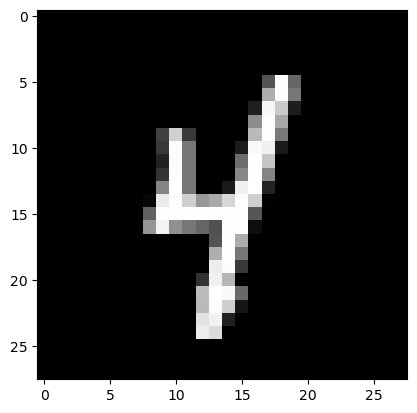

In [9]:
# Updated code from above
# Dataset statistics
print('Training image data: {0}'.format(mnist_data[0]))
print('Testing image data: {0}'.format(mnist_data[1]))

print('\nTest Labels: {0}'.format(mnist_info.features['label'].num_classes))

# Label distribution
num_labels = np.bincount([label for image, label in tfds.as_dataframe(mnist_data[1], mnist_info).itertuples(index=False)])
print('Label distribution:{0}'.format(list(zip(np.arange(10), num_labels))))

# Example image
print('\nTrain image 1 is labelled as {0}'.format(mnist_data[0].take(1)))
image = next(iter(mnist_data[0].take(1)))[0].numpy()
plt.imshow(image, cmap='gray')


Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

"Define the graph input: this is where we feed in our training images into the model. Since MNIST digits are pretty small and the model we're using is very simple, we'll feed them in as flat vectors."

In TensorFlow, computations are represented as graphs. The "graph input" is the set of values that are input into this graph. The text indicates that the graph input will be the training images, which are fed into the model during training.

Since each image in the MNIST dataset is a 2D array (28x28), and the model being used is simple, the images are reshaped into flat 1D arrays (or "vectors") of length 784 (since 28*28=784). This is a common practice for simple models or initial baselines.

In [10]:
# Define input placeholder
x = tf.placeholder(tf.float32, [None, 784])

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In TensorFlow 2.0 and above, the tf.placeholder function has been removed. The preferred way to feed data into your model is to use TensorFlow's tf.data API, which allows you to build complex input pipelines from simple, reusable pieces.

Here's an example of how you can define a function to flatten your images and one-hot encode your labels:

In [11]:
def preprocess(image, label):
    image = tf.reshape(image, [-1])  # This flattens the image
    label = tf.one_hot(label, depth=10)  # This one-hot encodes the label
    return image, label

You can then use this function with the map method to apply it to all elements in the training and test datasets:

In [12]:
mnist_train = mnist_train.map(preprocess)
mnist_test = mnist_test.map(preprocess)

Now each image is a flat tensor with 784 elements (28x28), and each label is a one-hot encoded tensor with 10 elements (for 10 classes).

This updated approach should work with your current version of TensorFlow.

The eleventh cell is a Markdown cell that provides an explanation of how the probabilities of each digit are calculated in the logistic regression model. Here's a summary:

The text explains that to calculate the predicted probabilities of each digit, the model starts with a linear transformation. For a given digit (let's say 3), it multiplies each value of the input vector (the flattened image) by a corresponding weight, sums them all together, and then adds a bias. This is expressed with the equation:

\[
y_3 = \sum_i w_{i,3} x_i + b_3
\]

The resulting value \(y_3\) is correlated with how likely the model thinks the input digit was a 3. The higher the value of \(y_3\), the more likely the model thinks the input image was a 3.

Since the goal is to identify all 10 digits, this is done for each digit, resulting in:

\[
\begin{align*}
y_0 &= \sum_i w_{i,0} x_i + b_0 \\
&\vdots \\
y_9 &= \sum_i w_{i,9} x_i + b_9
\end{align*}
\]

This can be expressed in matrix form as:

\[
y = W x + b 
\]

To put this into the TensorFlow computation graph, the weights and biases need to be defined as TensorFlow Variables.

The metaphor here is a little like a voting system. Each pixel in the image gets a vote on what digit they think the image is. The weight is how much that pixel's vote counts, and the bias is like a starting number of votes for each digit. The digit with the most votes (highest resulting \(y\) value) is the digit the model predicts.


In [13]:
# Define linear transformation
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

NameError: name 'x' is not defined

The error NameError: name 'x' is not defined is occurring because you're trying to use the variable x which was supposed to be defined using tf.placeholder function, a feature that has been removed from TensorFlow 2.0 and above.

With the newer versions of TensorFlow (TF2.x), the preferred way is to use Keras (which is integrated into TensorFlow) to define models. Here's an example of how you can define a simple linear model like the one in your code:

In [ ]:
from tensorflow.keras import models, layers

# Define the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flattens the input
    layers.Dense(10)  # Linear transformation
])